# synthetic timeseries:

1- Here we are generating synthetic timeseries in decimal year between 1850.0 and 2020.0 using the synthetic.py module, that contains a single harmonic component of period 10 years, and is evenly sampled every 12th of a year (i.e. every month).

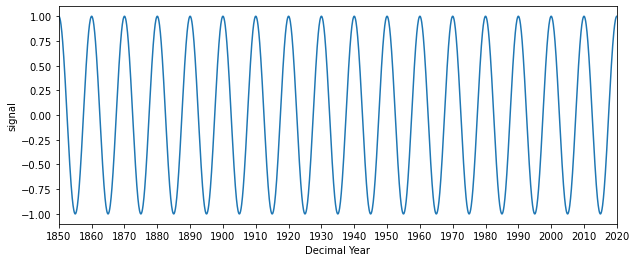

In [68]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from synthetic import *

%matplotlib inline 

time_start = 1850.0
time_end = 2020.0
t_samp = 1./12.

# define synthetic time series
timewindow = def_timewindow(time_start, time_end, t_samp)
period = 10. # in year
amp = 1.
phase = -2*np.pi*time_start/period
tseries = cos_ts(timewindow, period, amp, phase)

# plot it
fig = plt.figure( figsize = (10, 4) ) #figsize can be adjusted to your needs
plt.plot(timewindow, mytseries)
plt.xlabel('Decimal Year')
plt.ylabel('signal')
plt.xlim(time_start,time_end)
plt.xticks(np.linspace(time_start, time_end, endpoint = True, num = int( (time_end - time_start)/10 + 1 ) ) ) 
# show the figure
plt.show()

2- Then, we perform a spectral analysis of the signal s(t) and therefore we compute its (discrete) Fourier transform. Let s(f) denote this transform, with f the frequency (inverse of the period) - keeping in mind that the angular frequency w .....

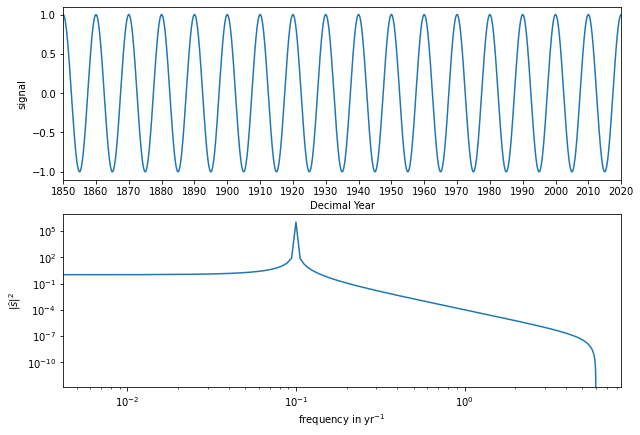

In [19]:
# compute its Fourier transform
myshat = np.fft.rfft(tseries) # 
# these are the associated frequencies (useful for subsequent plot)
freq = np.fft.rfftfreq(len(tseries),t_samp) # in year^{-1} 
# plot the timeseries and its power spectrum 
fig = plt.figure( figsize=(10,7) )
#
ax1 = fig.add_subplot(211)
ax1.plot(timewindow, mytseries)
ax1.set_xlabel('Decimal Year')
ax1.set_ylabel('signal')
ax1.set_xlim(time_start, time_end)
ax1.set_xticks(np.linspace(time_start, time_end, endpoint = True, num = int((time_end - time_start)/10 + 1 )))
#
ax2 = fig.add_subplot(212)
ax2.loglog(myfreq, abs(myshat)**2)
ax2.set_xlabel('frequency in yr$^{-1}$')
ax2.set_ylabel(r'|$\widehat{s}$|$^2$')
# show the figure
plt.show()

3- Now let us get acquainted with the Butterworth filters provided by the signal processing package of scientific python. The example below shows how to apply a bandpass filter, with corner periods equal to 5 and 15 yr, to the example timeseries I have been using so far.

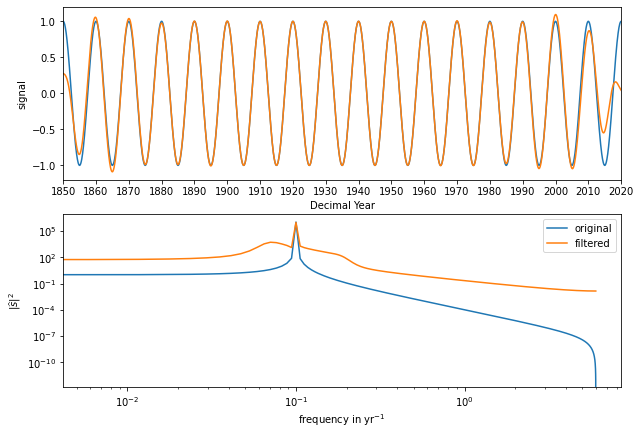

In [20]:
from scipy import signal 
# define Butterworth filter properties
#
# The frequency band [w_low_cut,w_high_cut] is given as a fraction of the 
# Nyquist Frequency which is equal to half of the sampling frequency
# 
T_long  = 15 # in yr
T_short = 5  # in yr
#
f_samp = 1./t_samp
f_nyq =  f_samp / 2
#
f_low_cut =  (1./T_long)  # in year^{-1}
w_low_cut =  f_low_cut / f_nyq # angular frequency
#
f_high_cut = (1./T_short)  # in year^{-1}
w_high_cut = f_high_cut / f_nyq          # angular frequency
# define filter properties
b,a = signal.butter(4, [w_low_cut,w_high_cut], 'band')
# apply filter to signal (twice, to avoid phasing) 
recons = signal.filtfilt(b,a,mytseries)
# compute its Fourier transform
reconshat = np.fft.rfft(recons)
#
# plot the timeseries and its power spectrum, as well as those
# of the filtered signal 
fig = plt.figure( figsize = (10, 7) )
#
ax1 = fig.add_subplot(211)
ax1.plot(timewindow, tseries)
ax1.plot(timewindow, recons)
ax1.set_xlabel('Decimal Year')
ax1.set_ylabel('signal')
ax1.set_xlim(time_start,time_end)
ax1.set_xticks(np.linspace(time_start, time_end, endpoint = True, num = int( (time_end - time_start)/10 + 1 )) )
#
ax2 = fig.add_subplot(212)
ax2.loglog(freq, abs(myshat)**2, label="original")
ax2.loglog(freq, abs(myreconshat)**2, label="filtered")
ax2.set_xlabel('frequency in yr$^{-1}$')
ax2.set_ylabel(r'|$\widehat{s}$|$^2$')
ax2.legend()
# show the figure
plt.show()

# Real Case:

CLF : Chambon-la-Forêt, where the French magnetic observatory is located since 1936. See e.g. www.bcmt.fr.

The file clf1936_2020.dat contains the monthly means of the geomagnetic elements recorded at the CLF observatory. The header of the file looks like so

    #This file is provided by the database of the "Bureau Central de   |
    #Magnetisme Terrestre" (BCMT, France).                             |
    #Conditions of use: these data are for scientific/academic use.    |
    #Formula for computing non-reported elements:                      |
    #X=H*cos(D), Y=H*sin(D), tan(I)=Z/H                                |
    #D is expressed in minutes of arc.                                 |
    #1-month values are computed from 24 monthly means of 1-hour       |
    #values.                                                           |
    #For any enquiry, please contact: bcmt@ipgp.fr                     |
    #DATE       TIME        DOY     CLFH      CLFD      CLFZ      CLFF
   
1- The code below reads the file and and plots the fluctuations of the vertical component (Z) at the site between 1936.0 and 2020.0.   

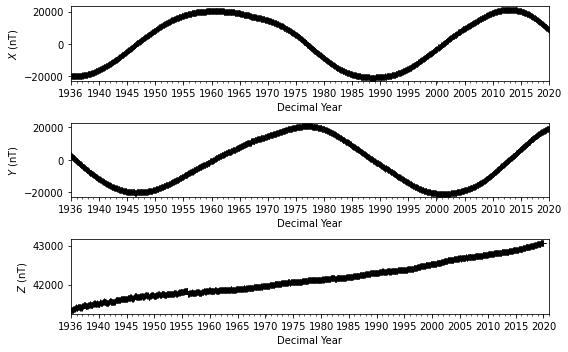

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import time
import math

datestr2num = lambda s: dts.datestr2num(s.decode('ascii'))
#
fname = 'clf1936-2020.dat'
#
#
data = np.loadtxt(fname, usecols=(0,3,4,5,6), converters={0:datestr2num})
#
epoch = data[:,0]
hcomp = data[:,1]
decl = data[:,2]/60. # declination expressed in degrees
zcomp = data[:,3]

xcomp = hcomp*np.cos(decl)
ycomp = hcomp*np.sin(decl)



#
years = dts.YearLocator()   # every year
months = dts.MonthLocator()  # every month
yearsFmt = dts.DateFormatter('%Y') # format for a year
#
# Plot timeseries of Z
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(311)
ax.plot(epoch,xcomp,'k+')
# format the ticks
ax.xaxis.set_minor_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
datemin = dts.datestr2num('1936-01-01')
datemax = dts.datestr2num('2020-12-31')
ax.set_xlim(datemin, datemax)
ax.set_xticks(np.arange(datemin,datemax,1826))
ax.set_xlabel('Decimal Year')
ax.set_ylabel('$X$ (nT)')

ax2 = fig.add_subplot(312)
ax2.plot(epoch,ycomp,'k+')
# format the ticks
ax2.xaxis.set_minor_locator(years)
ax2.xaxis.set_major_formatter(yearsFmt)
datemin = dts.datestr2num('1936-01-01')
datemax = dts.datestr2num('2020-12-31')
ax2.set_xlim(datemin, datemax)
ax2.set_xticks(np.arange(datemin,datemax,1826))
ax2.set_xlabel('Decimal Year')
ax2.set_ylabel('$Y$ (nT)')

ax3 = fig.add_subplot(313)
ax3.plot(epoch,zcomp,'k+')
# format the ticks
ax3.xaxis.set_minor_locator(years)
ax3.xaxis.set_major_formatter(yearsFmt)
datemin = dts.datestr2num('1936-01-01')
datemax = dts.datestr2num('2022-01-01')
ax3.set_xlim(datemin, datemax)
ax3.set_xticks(np.arange(datemin,datemax,1826))
ax3.set_xlabel('Decimal Year')
ax3.set_ylabel('$Z$ (nT)')
fig.tight_layout()
plt.show()

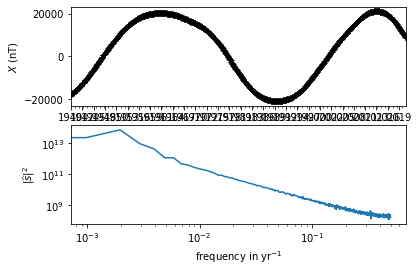

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import time
import math

datestr2num = lambda s: dts.datestr2num(s.decode('ascii'))
#
fname = 'clf1936-2020.dat'
#
#
data = np.loadtxt(fname, usecols=(0,3,4,5,6), converters={0:datestr2num})
#
epoch = data[:,0]
hcomp = data[:,1]
decl = data[:,2]/60. # declination expressed in degrees
zcomp = data[:,3]

xcomp = hcomp*np.cos(decl)
ycomp = hcomp*np.sin(decl)



#
years = dts.YearLocator()   # every year
months = dts.MonthLocator()  # every month
yearsFmt = dts.DateFormatter('%Y') # format for a year
#



# compute its Fourier transform
myshat = np.fft.rfft(xcomp) 
# these are the associated frequencies (useful for subsequent plot)
freq = np.fft.rfftfreq(len(xcomp)) # in year^{-1} 

# plot the timeseries and its power spectrum 
fig, axs = plt.subplots(2)

#
# Plot timeseries of X
axs[0].plot(epoch,xcomp,'k+')
# format the ticks
axs[0].xaxis.set_minor_locator(years)
axs[0].xaxis.set_major_formatter(yearsFmt)
datemin = dts.datestr2num('1940-01-01')
datemax = dts.datestr2num('2020-12-31')
axs[0].set_xlim(datemin, datemax)
axs[0].set_xticks(np.arange(datemin,datemax,1000))
axs[0].set_xlabel('year AD')
axs[0].set_ylabel('$X$ (nT)')

#

axs[1].loglog(freq, abs(myshat)**2)
axs[1].set_xlabel('frequency in yr$^{-1}$')
axs[1].set_ylabel(r'|$\widehat{s}$|$^2$')
# show the figure
plt.show()


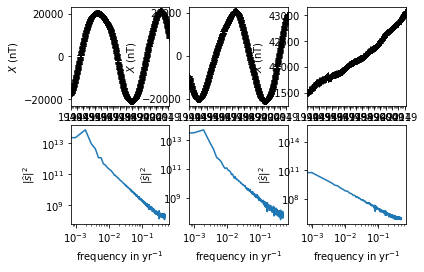

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import time
import math

datestr2num = lambda s: dts.datestr2num(s.decode('ascii'))
#
fname = 'clf1936-2020.dat'
#
#
data = np.loadtxt(fname, usecols=(0,3,4,5,6), converters={0:datestr2num})
#
epoch = data[:,0]
hcomp = data[:,1]
decl = data[:,2]/60. # declination expressed in degrees
zcomp = data[:,3]

xcomp = hcomp*np.cos(decl)
ycomp = hcomp*np.sin(decl)



#
years = dts.YearLocator()   # every year
months = dts.MonthLocator()  # every month
yearsFmt = dts.DateFormatter('%Y') # format for a year
#



# compute its Fourier transform
myshat1 = np.fft.rfft(xcomp) 
myshat2 = np.fft.rfft(ycomp) 
myshat3 = np.fft.rfft(zcomp) 
# these are the associated frequencies (useful for subsequent plot)
freq1 = np.fft.rfftfreq(len(xcomp)) # in year^{-1} 
freq2 = np.fft.rfftfreq(len(ycomp))
freq3 = np.fft.rfftfreq(len(zcomp))

# plot the timeseries and its power spectrum 
fig, axs = plt.subplots(2,3)


#
# Plot timeseries of X
axs[0,0].plot(epoch,xcomp,'k+')
# format the ticks
axs[0,0].xaxis.set_minor_locator(years)
axs[0,0].xaxis.set_major_formatter(yearsFmt)
datemin = dts.datestr2num('1940-01-01')
datemax = dts.datestr2num('2020-12-31')
axs[0,0].set_xlim(datemin, datemax)
axs[0,0].set_xticks(np.arange(datemin,datemax,1826))
axs[0,0].set_xlabel('Decimal Year')
axs[0,0].set_ylabel('$X$ (nT)')

#

axs[1,0].loglog(freq, abs(myshat1)**2)
axs[1,0].set_xlabel('frequency in yr$^{-1}$')
axs[1,0].set_ylabel(r'|$\widehat{s}$|$^2$')
###

# Plot timeseries of Y
axs[0,1].plot(epoch,ycomp,'k+')
# format the ticks
axs[0,1].xaxis.set_minor_locator(years)
axs[0,1].xaxis.set_major_formatter(yearsFmt)
datemin = dts.datestr2num('1940-01-01')
datemax = dts.datestr2num('2020-12-31')
axs[0,1].set_xlim(datemin, datemax)
axs[0,1].set_xticks(np.arange(datemin,datemax,1826))
axs[0,1].set_xlabel('Decimal Year')
axs[0,1].set_ylabel('$X$ (nT)')

#

axs[1,1].loglog(freq, abs(myshat2)**2)
axs[1,1].set_xlabel('frequency in yr$^{-1}$')
axs[1,1].set_ylabel(r'|$\widehat{s}$|$^2$')
###

# Plot timeseries of Z
axs[0,2].plot(epoch,zcomp,'k+')
# format the ticks
axs[0,2].xaxis.set_minor_locator(years)
axs[0,2].xaxis.set_major_formatter(yearsFmt)
datemin = dts.datestr2num('1940-01-01')
datemax = dts.datestr2num('2020-12-31')
axs[0,2].set_xlim(datemin, datemax)
axs[0,2].set_xticks(np.arange(datemin,datemax,1826))
axs[0,2].set_xlabel('Decimal Year')
axs[0,2].set_ylabel('$X$ (nT)')

#

axs[1,2].loglog(freq, abs(myshat3)**2)
axs[1,2].set_xlabel('frequency in yr$^{-1}$')
axs[1,2].set_ylabel(r'|$\widehat{s}$|$^2$')
# show the figure
plt.show()
